# The Sparks Foundation

# Data Science & Business Analytics

# Narsapuram Vamshi Chary

# Task 4

# Exploratory Data Analysis - Terrorism

# EDA is a process of analyzing the datasets to summarize their main features using numerical and visual methods

In [2]:

#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]

In [10]:
#Loading the data into the dataframe
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='cp1252')
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
df.shape
# 181691 rows and 135 columns

(181691, 135)

In [12]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [13]:
#Selecting the important columns for our further study and renaming them
df = df[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','attacktype1_txt',
         'targtype1_txt','gname','weaptype1_txt','nkill']]

In [14]:
df

,iyear,imonth,iday,extended,country_txt,region_txt,city,success,suicide,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,Ceelka Geelow,1,0,Armed Assault,Military,Al-Shabaab,Firearms,1.0
181687,2017,12,31,0,Syria,Middle East & North Africa,Jableh,1,0,Bombing/Explosion,Military,Muslim extremists,Explosives,2.0
181688,2017,12,31,0,Philippines,Southeast Asia,Kubentog,1,0,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0
181689,2017,12,31,0,India,South Asia,Imphal,0,0,Bombing/Explosion,Government (General),Unknown,Explosives,0.0


In [15]:
#After removing the insignificant variables,the dataset now has 14 columns with 181691 observations.

In [16]:
#lets rename the existing columns name 

In [17]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',
                   'region_txt':'Region','city':'City','success':'Success','suicide':'Suicide','attacktype1_txt':'Attack Type',
                   'targtype1_txt':'Target Type','gname':'Attack Group',
                   'weaptype1_txt':'Weapon Type','nkill':'No. of killings'},inplace=True)

In [18]:
df.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack Type,Target Type,Attack Group,Weapon Type,No. of killings
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN


In [20]:
df.dtypes

Year                 int64
Month                int64
Day                  int64
Extended             int64
Country             object
Region              object
City                object
Success              int64
Suicide              int64
Attack Type         object
Target Type         object
Attack Group        object
Weapon Type         object
No. of killings    float64
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Extended         181691 non-null  int64  
 4   Country          181691 non-null  object 
 5   Region           181691 non-null  object 
 6   City             181257 non-null  object 
 7   Success          181691 non-null  int64  
 8   Suicide          181691 non-null  int64  
 9   Attack Type      181691 non-null  object 
 10  Target Type      181691 non-null  object 
 11  Attack Group     181691 non-null  object 
 12  Weapon Type      181691 non-null  object 
 13  No. of killings  171378 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 19.4+ MB


In [ ]:
#Data contain one float ,6 integer values & rest are object values. All the variables are non-null.

In [23]:
df.describe()

,Year,Month,Day,Extended,Success,Suicide,No. of killings
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000
mean,2002.638997,6.467277,15.505644,0.045346,0.889598,0.036507,2.403272
std,13.259430,3.388303,8.814045,0.208063,0.313391,0.187549,11.545741
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,1.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,1.000000,0.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1570.000000


In [24]:
df.describe(include='O')

,Country,Region,City,Attack Type,Target Type,Attack Group,Weapon Type
count,181691,181691,181257,181691,181691,181691,181691
unique,205,12,36674,9,22,3537,12
top,Iraq,Middle East & North Africa,Unknown,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives
freq,24636,50474,9775,88255,43511,82782,92426


In [28]:
df['No. of killings'] = df['No. of killings'].fillna(0)
# we need to use fill nan values to 0 as we don't have value for the we consider it as 0 killing

In [29]:
#lets convert no of killings from float to int

df['No. of killings']=df['No. of killings'].astype('int')

In [30]:
df.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack Type,Target Type,Attack Group,Weapon Type,No. of killings
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,1
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0


In [32]:
#lets check for duplicates
df[df.duplicated()].shape

(15707, 14)

In [37]:
df.shape

(181691, 14)

In [38]:
#Droping duplicate values
df.drop_duplicates(inplace=True)

In [39]:
df.shape

(165984, 14)

In [41]:
df.describe()

,Year,Month,Day,Extended,Success,Suicide,No. of killings
count,165984.000000,165984.000000,165984.000000,165984.000000,165984.000000,165984.000000,165984.000000
mean,2003.096461,6.469943,15.523159,0.048161,0.887965,0.039022,2.430373
std,13.150953,3.390285,8.815357,0.214108,0.315410,0.193648,11.703920
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,1.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,1.000000,0.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1570.000000


In [42]:
# From the above data,We can conclude that there are some columns which mean value is less than median
# value (50%) and there are some columns which mean value is greater than median value (50%)
# there is a huge different b/w 75% and max values of predictors 'No of killings'

In [43]:
# We can conclude there are some extreme values in the given dataset,we need to find outliers.

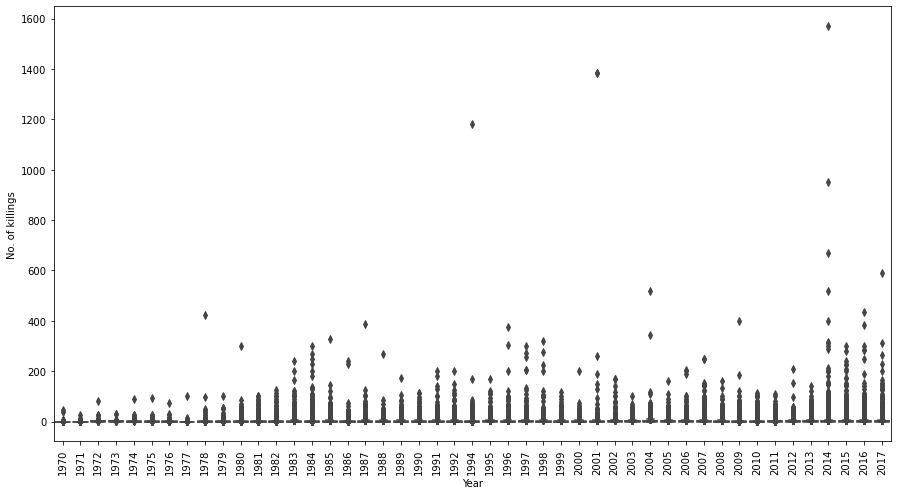

In [44]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Year'],y=df['No. of killings'])
plt.xticks(rotation=90)
plt.show()

In [45]:
# we can't ignore no of killing factor ,so we move forward with the outliers

In [55]:
#Checking the missing values
total=(df.isnull().sum()).sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

In [56]:
null_data=pd.concat([total,percent],axis=1,keys=['Total','percentage'])

In [48]:
null_data

,Total,percentage
City,411,0.002476
Year,0,0.000000
Month,0,0.000000
Day,0,0.000000
Extended,0,0.000000
Country,0,0.000000
Region,0,0.000000
Success,0,0.000000
Suicide,0,0.000000
Attack Type,0,0.000000


In [52]:
df['City']=df['City'].fillna('Unknown')
# we can fill null values with unknown in city column

In [57]:
null_data

,Total,percentage
Year,0,0.0
Month,0,0.0
Day,0,0.0
Extended,0,0.0
Country,0,0.0
Region,0,0.0
City,0,0.0
Success,0,0.0
Suicide,0,0.0
Attack Type,0,0.0


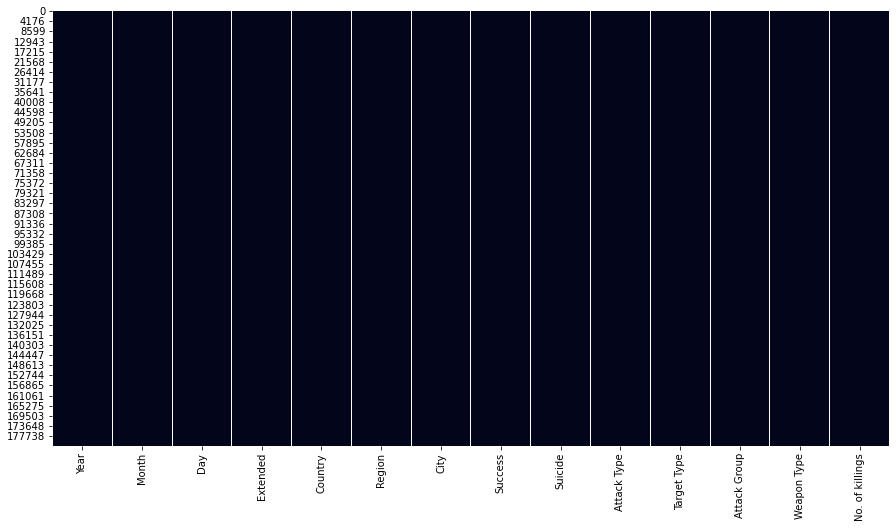

In [61]:
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [62]:
#From above we can see there is no missing values in the dataset. 

# Univariate Analysis 

In [64]:
df.columns

Index(['Year', 'Month', 'Day', 'Extended', 'Country', 'Region', 'City',
       'Success', 'Suicide', 'Attack Type', 'Target Type', 'Attack Group',
       'Weapon Type', 'No. of killings'],
      dtype='object')

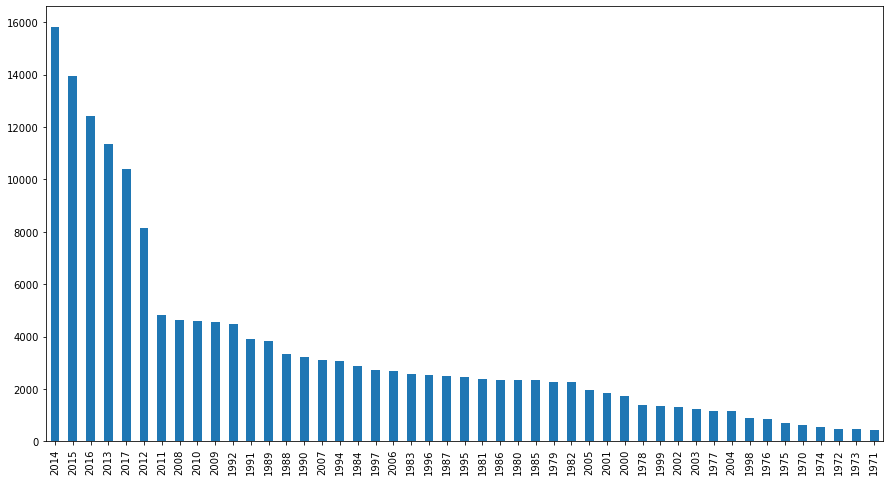

In [65]:
plt.figure(figsize=(15,8))
df['Year'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
#the rate of terrorism increasing year after year

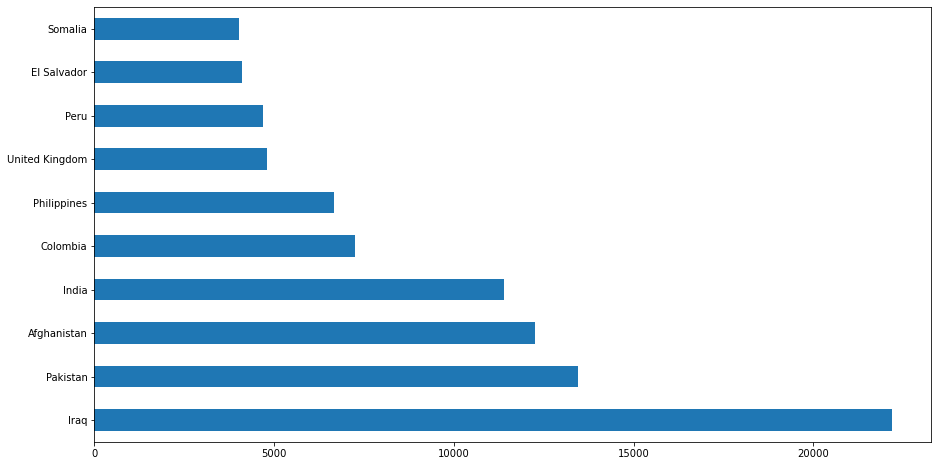

In [66]:
plt.figure(figsize=(15,8))
df['Country'].value_counts().iloc[:10].plot(kind='barh')
plt.show()

In [ ]:
# Iraq,Pakistan,Afghanistan are hot spot for terrorist activities

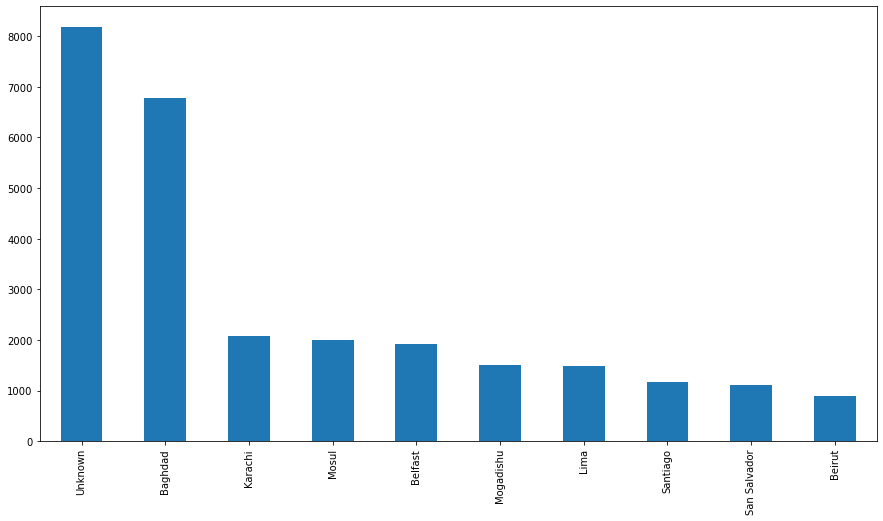

In [67]:
plt.figure(figsize=(15,8))
df['City'].value_counts().iloc[:10].plot(kind='bar')
plt.show()

In [ ]:
# there is highest number of unknown city names in data and Baghdad,Karachi are highest rate of terror event cities

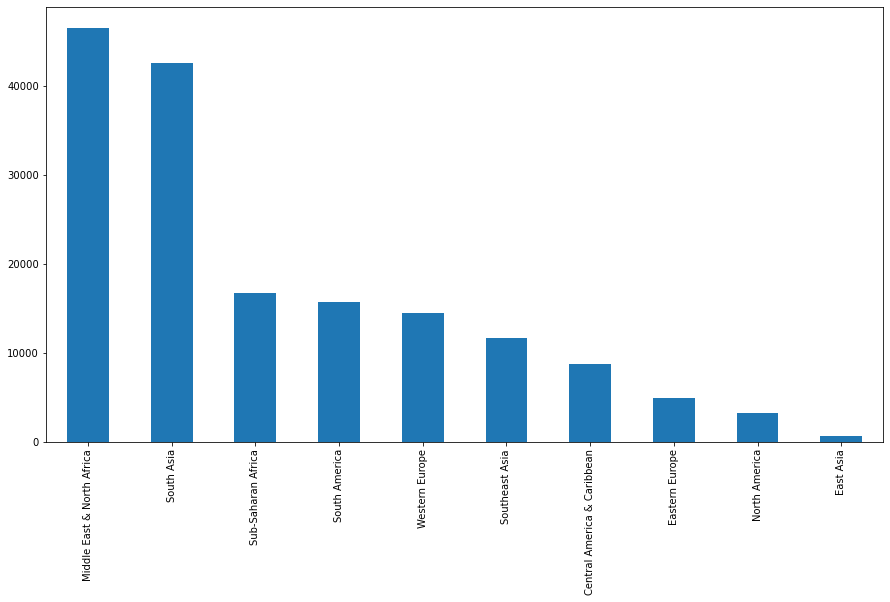

In [68]:
plt.figure(figsize=(15,8))
df['Region'].value_counts().iloc[:10].plot(kind='bar')
plt.show()

In [ ]:
# middle east & North africa region has high risk of terror followed by south asia

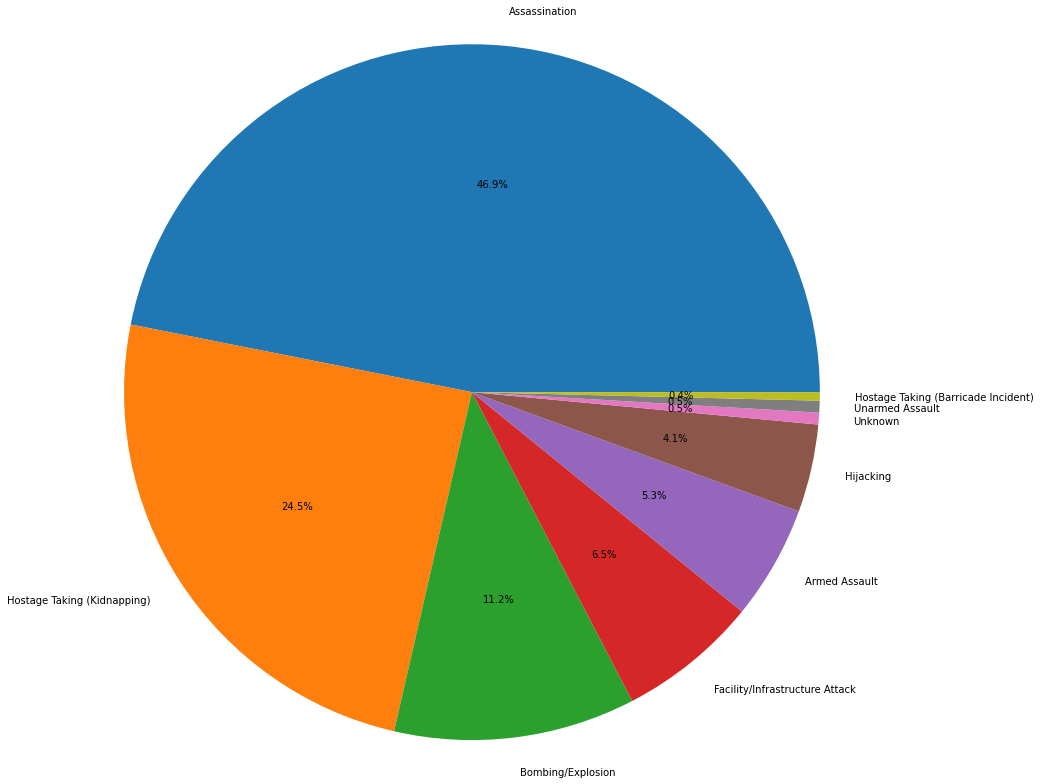

Bombing/Explosion                      0.468822
Armed Assault                          0.245241
Assassination                          0.112131
Hostage Taking (Kidnapping)            0.065229
Facility/Infrastructure Attack         0.052921
Unknown                                0.040793
Hostage Taking (Barricade Incident)    0.005482
Unarmed Assault                        0.005476
Hijacking                              0.003904
Name: Attack Type, dtype: float64


In [69]:
values=df['Attack Type'].value_counts()
names=df['Attack Type'].unique().tolist()
plt.pie(values,labels=names,radius=2,autopct='%1.1f%%')
plt.show()
print(values/len(df['Attack Type']))


In [ ]:
# There is 46% of bombing and explosion is the most common attack type
# There is 24% of Armed Assault attact type

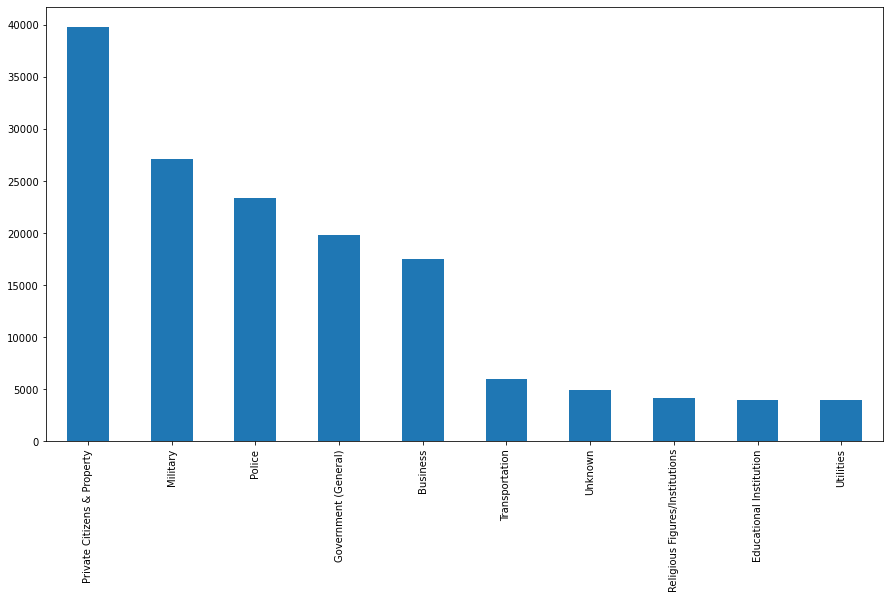

Private Citizens & Property       39741
Military                          27075
Police                            23366
Government (General)              19808
Business                          17545
Transportation                     5952
Unknown                            4946
Religious Figures/Institutions     4157
Educational Institution            3983
Utilities                          3930
Government (Diplomatic)            3396
Terrorists/Non-State Militia       2961
Journalists & Media                2805
Violent Political Party            1767
Airports & Aircraft                1296
NGO                                 947
Telecommunication                   880
Tourists                            425
Maritime                            336
Food or Water Supply                294
Abortion Related                    243
Other                               131
Name: Target Type, dtype: int64


In [70]:
plt.figure(figsize=(15,8))
df['Target Type'].value_counts().iloc[:10].plot(kind='bar')
plt.show()
print(df['Target Type'].value_counts())


In [ ]:
# terrorist are highly targeting private citizens & property followed by military,police,govenment generals

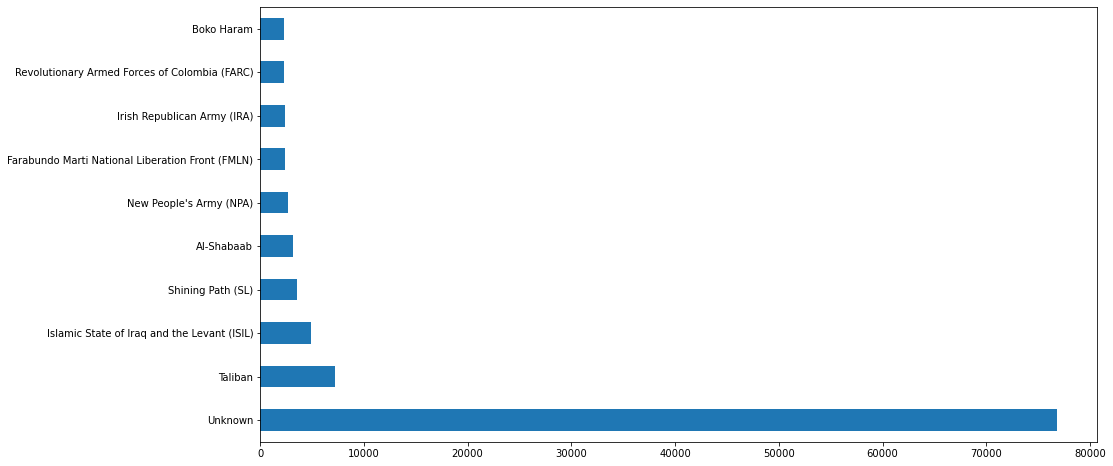

Unknown                                        76848
Taliban                                         7179
Islamic State of Iraq and the Levant (ISIL)     4891
Shining Path (SL)                               3509
Al-Shabaab                                      3173
                                               ...  
Armenian Revolutionary Army                        1
Mexican Revolutionary Movement                     1
Communist Attack Units                             1
National Liberation Movement Party                 1
Peasant Militants                                  1
Name: Attack Group, Length: 3537, dtype: int64


In [71]:
plt.figure(figsize=(15,8))
df['Attack Group'].value_counts().iloc[:10].plot(kind='barh')
plt.show()
print(df['Attack Group'].value_counts())

In [ ]:
# The Attact group is highly unknown as per data,2nd highest is Taliban and followed by ISIL

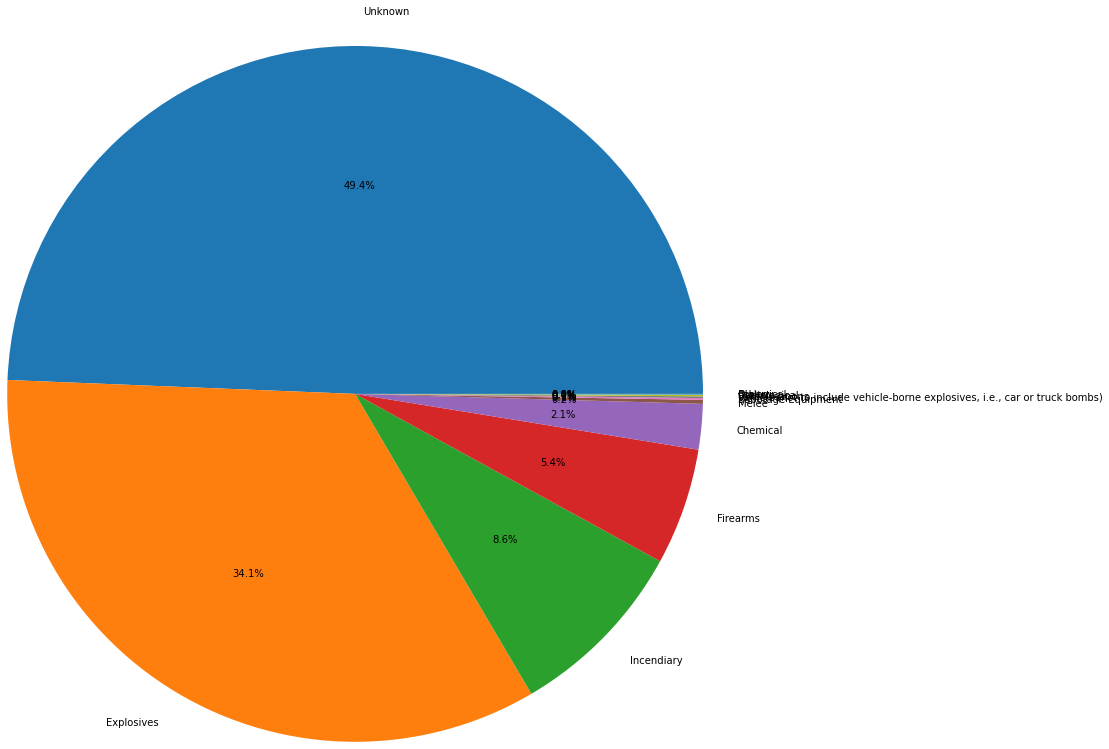

Explosives                                                                     0.493632
Firearms                                                                       0.340930
Unknown                                                                        0.085568
Incendiary                                                                     0.054204
Melee                                                                          0.021092
Chemical                                                                       0.001832
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)    0.000813
Sabotage Equipment                                                             0.000813
Other                                                                          0.000663
Biological                                                                     0.000211
Fake Weapons                                                                   0.000199
Radiological                    

In [72]:
values=df['Weapon Type'].value_counts()
names=df['Weapon Type'].unique().tolist()
plt.pie(values,labels=names,radius=2,autopct='%1.1f%%')
plt.show()
print(values/len(df['Weapon Type']))

In [ ]:
#Explosives are highly used weapon with 49% and firearms of 34%

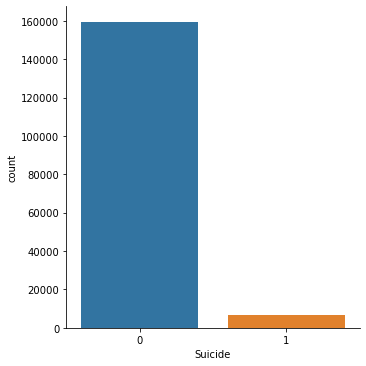

In [73]:
sns.factorplot('Suicide',data=df,kind='count')
plt.show()

In [ ]:
# there is less amount of suicide rate

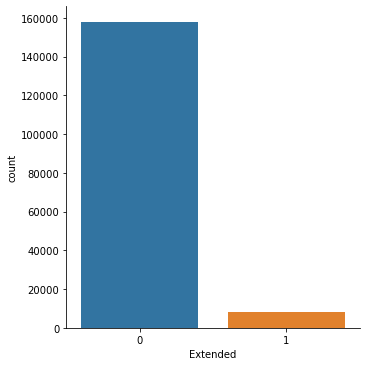

In [74]:
sns.factorplot('Extended',data=df,kind='count')
plt.show()

In [ ]:
# there is less amount of Extended rate

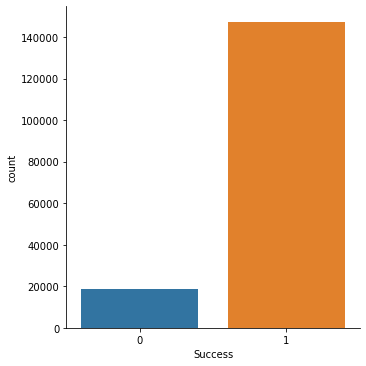

In [75]:
sns.factorplot('Success',data=df,kind='count')
plt.show()

In [ ]:
# there is high amount of success rate

# Bivariate Analysis

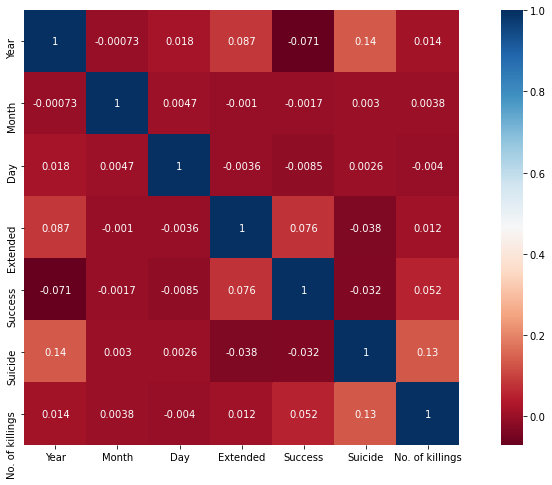

In [77]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),square=True,annot=True,cmap='RdBu',linecolor='black')
plt.show()


In [78]:
# There is No strong correlation between the variables as they are almost near to zero

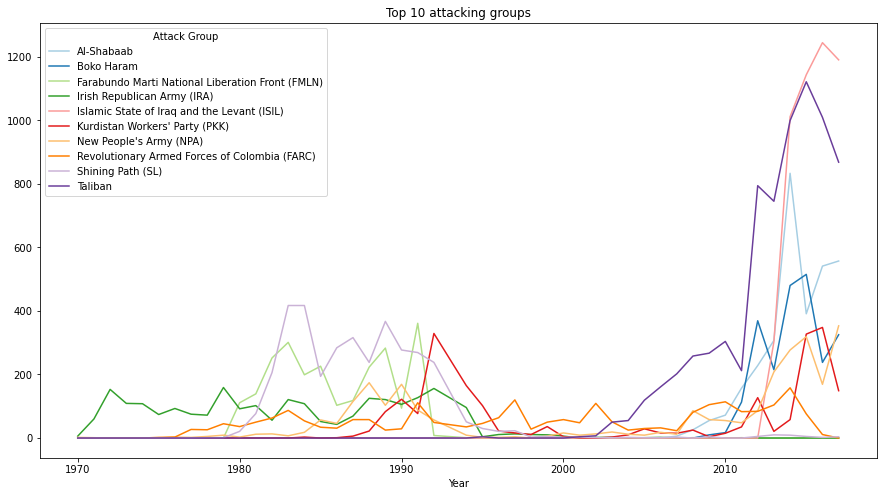

In [79]:
most_attacking_groups=df[df['Attack Group'].isin(df['Attack Group'].value_counts()[1:11].index)]
pd.crosstab(most_attacking_groups.Year,most_attacking_groups['Attack Group']).plot(color=sns.color_palette('Paired',15))
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.title("Top 10 attacking groups")
plt.show()

In [ ]:
# we can see top 10 attacking groups
# taliban and ISIL raise there terrorist activity from 2000s 

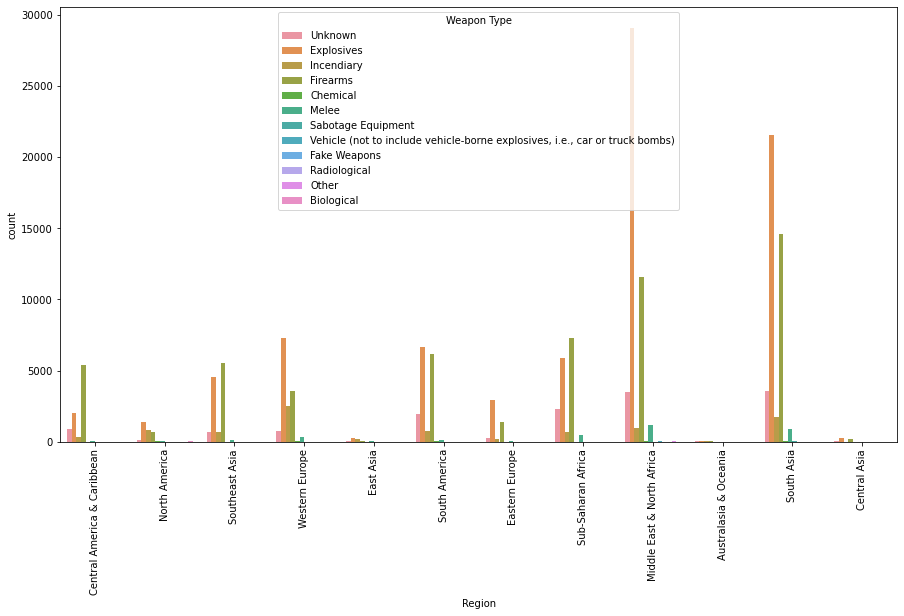

In [80]:
sns.countplot(x=df['Region'],hue=df['Weapon Type'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# In central america & Caribbean,Southeast Asia,sub-Saharan Africa  firearms weapon type is most prefered by terrorists
# In west,south,middle east,south asia Explosives are most used weapon type

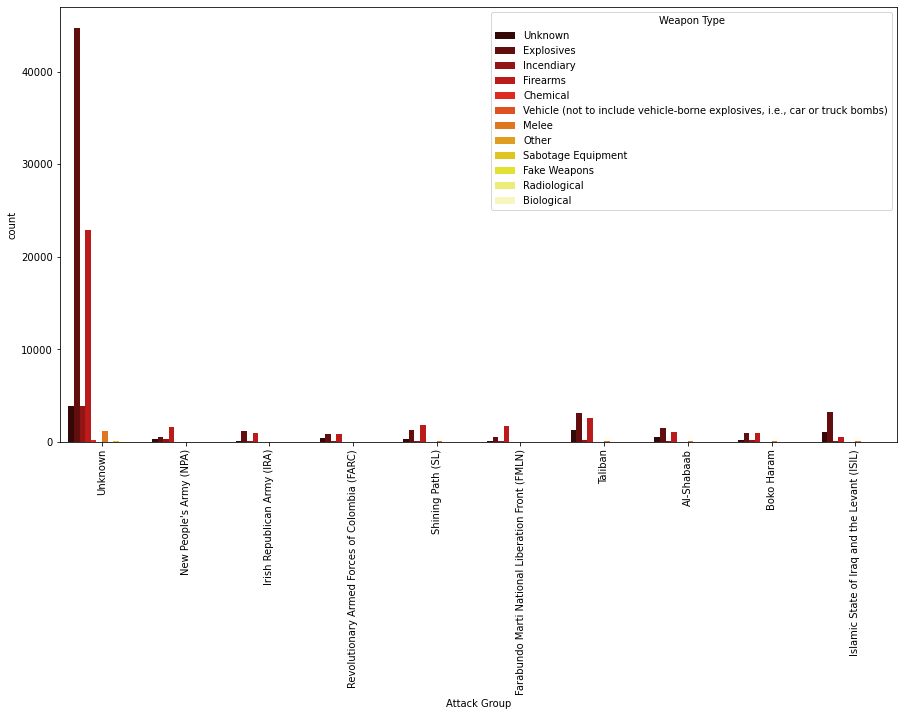

In [81]:
most_attacking_groups = df['Attack Group'].value_counts().index.tolist()[0:10]
df1 = df[['Attack Group','Weapon Type']]
most_used_weapon = df1[df1['Attack Group'].isin(most_attacking_groups)]
sns.countplot(x='Attack Group', hue ='Weapon Type', data = most_used_weapon,palette = "hot")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# most attack group is unknown and weapon type is also highly unknown

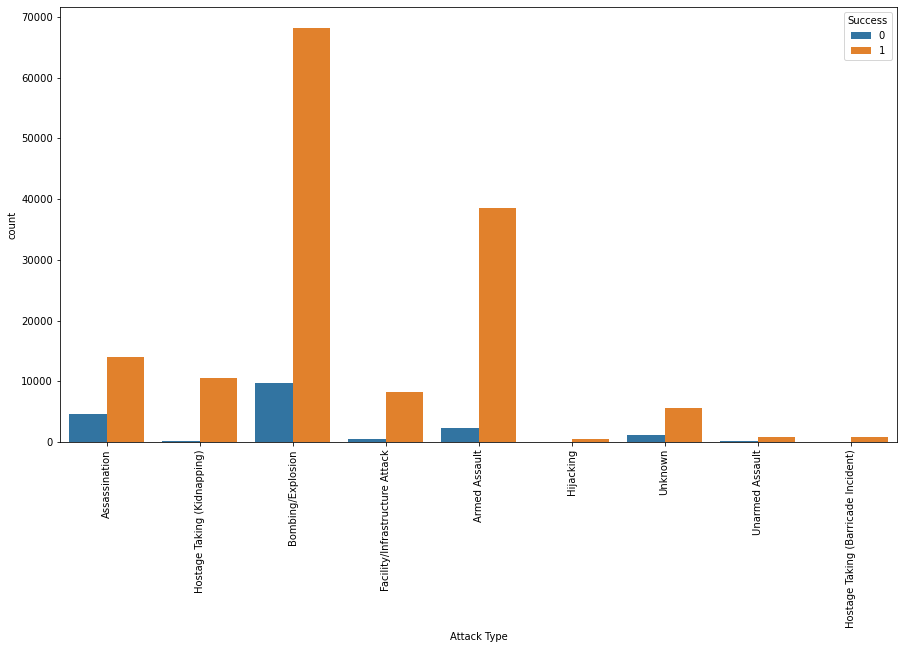

In [82]:
sns.countplot(df['Attack Type'],hue=df['Success'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Bombing/Explosion has high rate of success rate of death followed by Armed Assault

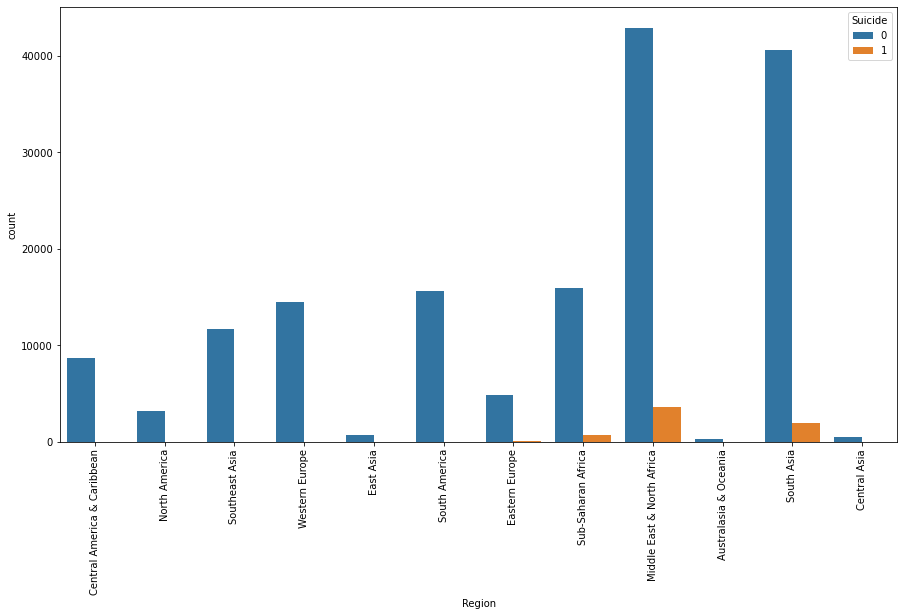

In [83]:
sns.countplot(df['Region'],hue=df['Suicide'])
plt.xticks(rotation=90)
plt.show()


In [ ]:
# high rate of suicide in middle east & north africa and then south asia  and sub-saharan africa
# rest all other region as zero suicide rate